In [1]:
### Developed by Prabhash Kumar Jha and Isheeta Jha ###

import numpy as np
import matplotlib.pyplot as plt

def GetData( ):
    input_var = []
    out_var = []
    f = open("LinRegData.txt","r")
    lines = f.readlines()
    for x in lines:
        fields = x.split(' ')
        input_var = np.append(input_var,float(fields[3]))
        if fields[5]=='':
            out_var = np.append(out_var,float(fields[6]))
        else:
            out_var = np.append(out_var,float(fields[5]))
    f.close()

    return input_var,out_var


In [2]:
def Getpolymatrix(dataset,n):
    Matrix = [[0 for x in range(n)] for y in range(len(dataset))]  #X data set in polynominal format
    k = 0
    for data in dataset:
        temp = []
        for i in range(n):
            temp=np.append(temp,data**i)
        Matrix[k] = temp
        k = k+1
    return Matrix

In [3]:
def Getphix(data,n):
    Matrix = [0 for x in range(n)]  #X data set in polynominal format
    for i in range(n):
        Matrix[i]=data**i
    return Matrix

In [4]:
input_var,out_var=GetData();
dataset=np.vstack((input_var,out_var))
training_set = np.array([input_var[0:20] ,out_var[0:20]])
testing_set = np.array([input_var[20:151] ,out_var[20:151]])

nb =13;#best polynomial order=12 chosen from previous
lmda = 0.000001;
sigN2 = 0.0025;
beta =1/sigN2;
alpha=lmda*beta;
#t=20;
#matx=Getpolymatrix(input_var[0:t],nb);
#matxT=np.transpose(matx)
#Sn_inv = (beta*np.matmul(matxT,matx)+alpha*np.identity(nb))
#Sn_inv = alpha*np.identity(nb)
#Sn = np.linalg.inv(Sn_inv) 
#mean = (beta*np.matmul(Sn,np.matmul(matxT,out_var[0:t]))) #mean of weights
#mean

'dyfit'

0.11207350786810108

'mean_all'

1.3874982594160201

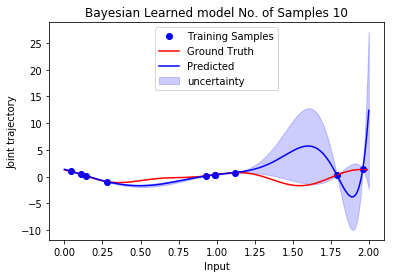

'dyfit'

0.11065970882726182

'mean_all'

1.4626995875687498

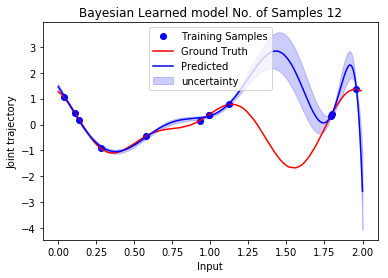

'dyfit'

0.10566884533343586

'mean_all'

1.5954548899458132

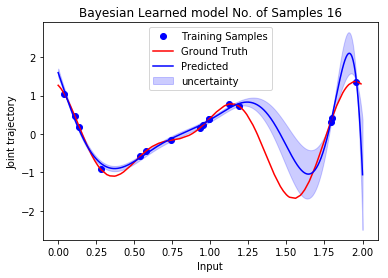

'dyfit'

0.10478127895693184

'mean_all'

1.662846853935207

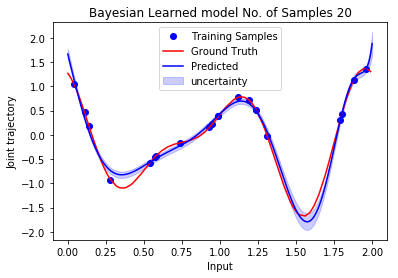

'dyfit'

0.086596767697977847

'mean_all'

1.5732863484345216

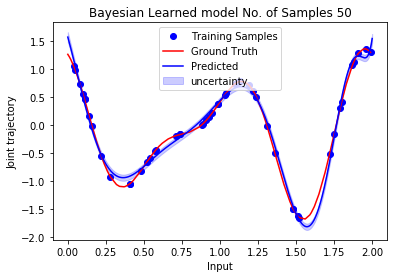

'dyfit'

0.057722741196233038

'mean_all'

1.3432615113524795

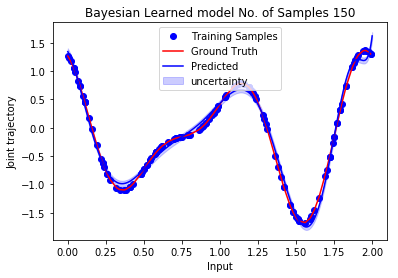

In [5]:
pts=[10,12,16,20,50,150]
nb=13
k=0
x=np.linspace(0,2,1000)
Matrix_x=Getpolymatrix(x,nb); 
Matrix_xT=np.transpose(Matrix_x);
for t in pts:  
    var2=[0 for x in range(1000)]
    matx=Getpolymatrix(input_var[0:t],nb);
    matxT=np.transpose(matx)
    Sn_inv = (beta*np.matmul(matxT,matx)+alpha*np.identity(nb))
    Sn = np.linalg.inv(Sn_inv) 
    mean = (beta*np.matmul(Sn,np.matmul(matxT,out_var[0:t])))  
    for i in range(1000):
        phix = Getphix(x[i],nb);
        phixT = np.transpose(phix)
        var2[i] = (1/beta) + np.matmul(phixT,np.matmul(Sn,phix))
    dyfit = np.sqrt(var2)
    display("dyfit")
    display(dyfit[0])
    mean_all = np.dot(Matrix_x,mean)
    display("mean_all")
    display(mean_all[0])
    order = np.argsort(input_var[0:t])
    xs = np.array(input_var[0:t])[order]
    ys = np.array(out_var[0:t])[order]
    plt.plot(xs,ys,'bo',label="Training Samples")
    order1 = np.argsort(input_var)
    xs1 = np.array(input_var)[order1]
    ys1 = np.array(out_var)[order1]
    plt.plot(xs1,ys1,'r',label='Ground Truth')
    plt.plot(x, mean_all, '-', color='blue',label='Predicted')
    plt.fill_between(x, mean_all - dyfit,  mean_all + dyfit,color='blue', alpha=0.2,label='uncertainty')
    plt.legend(loc='upper center')
    plt.title('Bayesian Learned model No. of Samples %i' %t)
    plt.ylabel('Joint trajectory')
    plt.xlabel('Input')
    plt.show()
#display(Sn)

In [8]:
for t in pts:
    
    display(mean)
    mu=[0 for x in range(1000)]
    var2=[0 for x in range(1000)]
    

array([   1.34326151,   -4.70021545,  -60.22283969,  260.71356307,
       -324.89860314,   -0.74143353,  237.38989376,  -12.69755972,
       -174.9570641 ,   54.15048175,   55.99779307,  -37.24613852,
          6.30410438])

array([   1.34326151,   -4.70021545,  -60.22283969,  260.71356307,
       -324.89860314,   -0.74143353,  237.38989376,  -12.69755972,
       -174.9570641 ,   54.15048175,   55.99779307,  -37.24613852,
          6.30410438])

array([   1.34326151,   -4.70021545,  -60.22283969,  260.71356307,
       -324.89860314,   -0.74143353,  237.38989376,  -12.69755972,
       -174.9570641 ,   54.15048175,   55.99779307,  -37.24613852,
          6.30410438])

array([   1.34326151,   -4.70021545,  -60.22283969,  260.71356307,
       -324.89860314,   -0.74143353,  237.38989376,  -12.69755972,
       -174.9570641 ,   54.15048175,   55.99779307,  -37.24613852,
          6.30410438])

array([   1.34326151,   -4.70021545,  -60.22283969,  260.71356307,
       -324.89860314,   -0.74143353,  237.38989376,  -12.69755972,
       -174.9570641 ,   54.15048175,   55.99779307,  -37.24613852,
          6.30410438])

array([   1.34326151,   -4.70021545,  -60.22283969,  260.71356307,
       -324.89860314,   -0.74143353,  237.38989376,  -12.69755972,
       -174.9570641 ,   54.15048175,   55.99779307,  -37.24613852,
          6.30410438])